In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from pathlib import Path
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import find_outliers, convert_age_from_days_to_years, extractqrcode, draw_age_distribution, calculate_code_age_distribution

### Total no. of artifacts in dataset

In [2]:
DATASET_PATH = Path('/mnt/datasets/dataset-2021-07-27-12-48-51')
CWD = Path(os.getcwd())
print(CWD)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/cgmml/data_utils/dataset_EDA/anon-depthmap-17k


In [30]:
!ls /mnt/datasets/dataset-2021-07-27-12-48-51/scans/ab575ae5-eecc-11eb-af66-e3654568dc70/100/pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.569847_100_8.p

'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:30.694898_100_1.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:30.819902_100_2.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:30.944844_100_3.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.085532_100_4.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.210469_100_5.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.319921_100_6.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.444909_100_7.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.569847_100_8.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.694911_100_9.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.804301_100_10.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.960548_100_11.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:32.101144_100_12.p'
'pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:32.241736_100_1

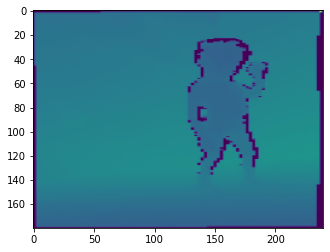

In [33]:
paths  = DATASET_PATH / 'scans/ab575ae5-eecc-11eb-af66-e3654568dc70/100/pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.569847_100_8.p'
depthmap, targets = pickle.load(open(paths, "rb"))
_ = plt.imshow(np.squeeze(depthmap))
plt.show()

In [34]:
print("targets: ", targets)
print("targets.shape: ", targets.shape)
print("depthmap.shape: ", depthmap.shape)

targets:  [86.6   9.25 12.  ]
targets.shape:  (3,)
depthmap.shape:  (180, 240, 1)


In [5]:
artifacts = pd.read_csv(CWD / 'data-depthmap-17k.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 1017


,id,scan_type_id,age,sex,height,weight,muac
0,d68bfb22-eec8-11eb-af66-bb6453bc1e55,101,903,male,76.1,8.7,12.7
1,d69522e0-eec8-11eb-af66-0fd5f4f83887,100,903,male,76.1,8.7,12.7
2,d6983022-eec8-11eb-af66-07faee9ed551,102,903,male,76.1,8.7,12.7
3,dcb5bd62-eec8-11eb-af66-27a8fd35eb01,201,238,male,66.9,7.1,13.6
4,dcbd5e80-eec8-11eb-af66-f7a4aec0920d,200,238,male,66.9,7.1,13.6


In [6]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,id,scan_type_id,age,sex,height,weight,muac,Years
0,d68bfb22-eec8-11eb-af66-bb6453bc1e55,101,903,male,76.1,8.7,12.7,2
1,d69522e0-eec8-11eb-af66-0fd5f4f83887,100,903,male,76.1,8.7,12.7,2
2,d6983022-eec8-11eb-af66-07faee9ed551,102,903,male,76.1,8.7,12.7,2
3,dcb5bd62-eec8-11eb-af66-27a8fd35eb01,201,238,male,66.9,7.1,13.6,0
4,dcbd5e80-eec8-11eb-af66-f7a4aec0920d,200,238,male,66.9,7.1,13.6,0


### Total no. of children in the dataset

In [7]:
print("Total no. of artifacts:", len(artifacts))
unique_ids = artifacts.drop_duplicates(subset='id', keep='first')
print("Total no. of unique ids:", len(unique_ids))
unique_ids.head()

Total no. of artifacts: 1017
Total no. of unique ids: 1014


,id,scan_type_id,age,sex,height,weight,muac,Years
0,d68bfb22-eec8-11eb-af66-bb6453bc1e55,101,903,male,76.1,8.7,12.7,2
1,d69522e0-eec8-11eb-af66-0fd5f4f83887,100,903,male,76.1,8.7,12.7,2
2,d6983022-eec8-11eb-af66-07faee9ed551,102,903,male,76.1,8.7,12.7,2
3,dcb5bd62-eec8-11eb-af66-27a8fd35eb01,201,238,male,66.9,7.1,13.6,0
4,dcbd5e80-eec8-11eb-af66-f7a4aec0920d,200,238,male,66.9,7.1,13.6,0


2021-08-09 16:30:39,224 - INFO - 0     98
1    229
2    225
3    213
4    246
5      3
Name: Years, dtype: int64 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 33


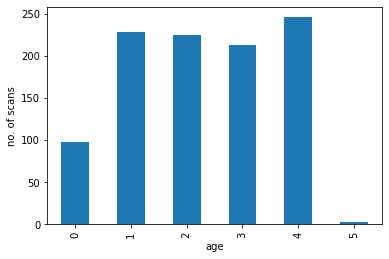

In [8]:
draw_age_distribution(unique_ids)

100    269
102    265
101    265
201     73
200     73
202     72
Name: scan_type_id, dtype: int64


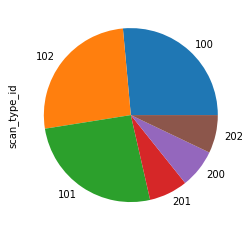

In [9]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['scan_type_id'].value_counts())
_ = artifacts['scan_type_id'].value_counts().plot(kind='pie')

In [10]:
scan_type_colname = 'scan_type_id' # for other datasets this can be "key"
calculate_code_age_distribution(artifacts, scan_type_colname)

2021-08-09 16:30:42,608 - INFO - scan_type_id - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 54


,0,1,2,3,4
codes,,,,,
101,2,35,73,71,83
100,2,39,73,71,83
102,2,35,73,71,83
201,31,40,2,0,0
200,31,40,2,0,0
202,30,40,2,0,0


In [11]:
calculate_code_age_distribution(unique_ids, scan_type_colname)

2021-08-09 16:30:44,297 - INFO - scan_type_id - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 54


,0,1,2,3,4
codes,,,,,
101,2,35,73,71,82
100,2,39,73,71,82
102,2,35,73,71,82
201,31,40,2,0,0
200,31,40,2,0,0
202,30,40,2,0,0


### Distribution of height, weight and age against each other

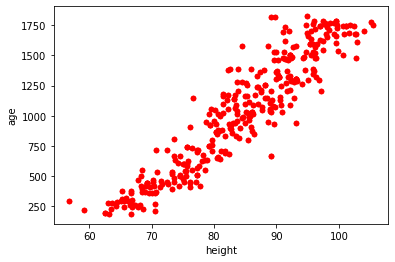

In [12]:
#distribution of height against age
height_vs_age = unique_ids.plot.scatter(x='height', y='age', c='red')


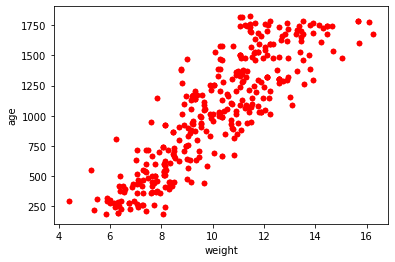

In [13]:
#distribution of weight against age
weight_vs_age = unique_ids.plot.scatter(x='weight', y='age', c='red')

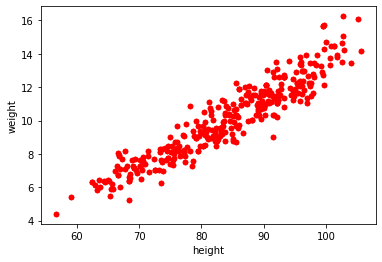

In [14]:
## distribution of height against weight
weight_vs_height = unique_ids.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [15]:
artifacts.describe()

,scan_type_id,age,height,weight,muac,Years
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,122.430678,1023.978368,84.066568,10.080973,13.604228,2.290069
std,41.065980,472.984501,10.537968,2.331088,1.025162,1.320429
min,100.000000,184.000000,56.700000,4.400000,10.000000,0.000000
25%,100.000000,601.000000,76.100000,8.150000,12.800000,1.000000
50%,101.000000,1042.000000,84.900000,10.200000,13.500000,2.000000
75%,102.000000,1391.000000,92.100000,11.750000,14.300000,3.000000
max,202.000000,1826.000000,105.500000,16.250000,16.700000,5.000000


In [16]:
unique_ids.describe()

,scan_type_id,age,height,weight,muac,Years
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,122.494083,1022.265286,84.020611,10.064349,13.595365,2.285010
std,41.110131,472.632035,10.519551,2.314364,1.013613,1.319095
min,100.000000,184.000000,56.700000,4.400000,10.000000,0.000000
25%,100.000000,598.750000,75.875000,8.150000,12.800000,1.000000
50%,101.000000,1040.500000,84.900000,10.200000,13.500000,2.000000
75%,102.000000,1390.000000,92.100000,11.700000,14.300000,3.000000
max,202.000000,1826.000000,105.500000,16.250000,16.700000,5.000000


### 1) Check age

##### Check age < 6 months or  > 6 years

In [17]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='id')

2021-08-09 16:30:52,960 - INFO - Running the following query: @df.age<365/2 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-09 16:30:52,981 - INFO - No. of outliers: 0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 79


[]

In [18]:
find_outliers(artifacts, 'age', '>365*6', data_id_name='id')

2021-08-09 16:30:53,876 - INFO - Running the following query: @df.age>365*6 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-09 16:30:53,880 - INFO - No. of outliers: 0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 79


[]

### 2) Check weight

In [19]:
find_outliers(artifacts, 'weight', '<5.0', data_id_name='id')

2021-08-09 16:30:56,291 - INFO - Running the following query: @df.weight<5.0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-09 16:30:56,296 - INFO - No. of outliers: 3 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 79


['4601eaa2-eec9-11eb-af66-b308249c514a',
 '46067e80-eec9-11eb-af66-dbfb4db6e647',
 '460b1260-eec9-11eb-af66-576c6a56f8bd']

In [20]:
find_outliers(artifacts, 'weight', '>30.0', data_id_name='id')

2021-08-09 16:30:58,812 - INFO - Running the following query: @df.weight>30.0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-09 16:30:58,816 - INFO - No. of outliers: 0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 79


[]

### 3) Check height

In [21]:
find_outliers(artifacts, 'height', '<40.0', data_id_name='id')

2021-08-09 16:31:00,345 - INFO - Running the following query: @df.height<40.0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-09 16:31:00,349 - INFO - No. of outliers: 0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 79


[]

In [22]:
find_outliers(artifacts, 'height', '>150.0', data_id_name='id')

2021-08-09 16:31:01,734 - INFO - Running the following query: @df.height>150.0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-09 16:31:01,738 - INFO - No. of outliers: 0 - /mnt/batch/tasks/shared/LS_root/mounts/clusters/jziegler1/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 79


[]